In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [2]:
df_1=pd.read_csv('./../data/TrainingSet/ACT1_competition_training.csv')
df_1.head()

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#check missing values
columns = df_1.columns
percent_missing = df_1.isnull().sum() * 100 / len(df_1)
missing_value_df_1 = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

missing_value_df_1.loc[missing_value_df_1['percent_missing'] != 0.0]
# no missing values

,column_name,percent_missing


In [3]:
# drop the first two columns
df_1.drop(df_1.columns[[0, 1]], axis=1, inplace=True)

In [13]:
var_t=sum(df_1.var())

In [24]:
# near zero variance function
def remove_feat_constants(data_frame,threshold):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold(threshold)
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    var = sum(data_frame.var())
    n_features_deleted = feat_ix_delete.size
    n_features_leftover = n_features_originally - n_features_deleted
    #print("  - Deleted %s / %s features (~= %.1f %%)" % (
        #n_features_deleted, n_features_originally,
        #100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame,var,n_features_leftover

In [36]:
var_percent_list=[]
n_features_left_list = []
for i in np.linspace(4,15,20):
    var_df_1 = remove_feat_constants(df_1,i)[1]
    n_features_left = remove_feat_constants(df_1,i)[2]
    var_percent_list.append(var_df_1/var_t)
    n_features_left_list.append(n_features_left)

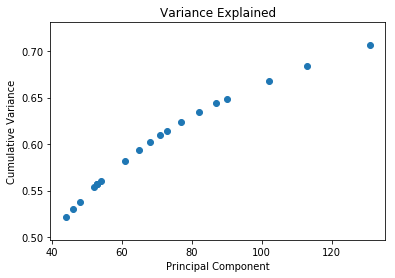

In [37]:
plt.scatter(n_features_left_list,var_percent_list)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()